In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot 

from sklearn.preprocessing import StandardScaler # 정규화 

In [42]:
path = '../data/pima-indians-diabetes3.csv'

In [43]:
raw = pd.read_csv(path)

df = raw.copy()

df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
#x(독립변수), y(종속변수)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
x.columns

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age'],
      dtype='object')

In [46]:
#정규화 

sc = StandardScaler()
# 표준화 : 평균 0 , 분산(표준편차) 1 
sc.fit_transform(x)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [47]:
pd.DataFrame(sc.fit_transform(x), columns=x.columns)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [48]:
scaled_x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
scaled_x.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


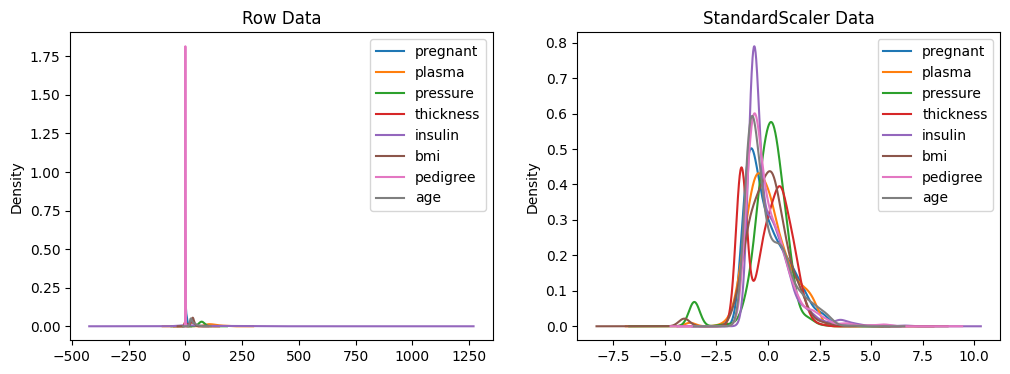

In [49]:
fig, ax = plt.subplots(1,2 ,figsize=(12,4))

x.plot(kind='kde', title='Row Data', ax=ax[0])
scaled_x.plot(kind='kde', title='StandardScaler Data', ax=ax[1])
plt.show()

#데이터 스케일링 이전: 데이터가 너무 편협하게 분포되어 있음
#데이터 스케일링 이후 : 데이터가 평균 0에 맞춰 고르게 분포됨 

In [50]:
# 데이터 셋 구분(학습용/평가용)

x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size=0.25, random_state=0)

1. 의사결정나무(결정트리)

In [51]:
#결정트리 분류기 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [52]:
#학습 실행 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
#테스트 셋에 적용 
y_pred = dt.predict(x_test)

In [54]:
#계층별 교차검증 
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [55]:
# 교차검증을 통해 정확도 계산 
accuracy = cross_val_score(estimator= dt, X=x_train, y=y_train, cv=skf)

In [63]:
#정확도와 표준편차 출력 
print('Accuracy : {:.2f} %'.format(accuracy.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracy.std()*100))


Accuracy : 66.32 %
Standard Deviation : 3.29 %


2. 랜덤 포레스트

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [74]:
#계층별 교차 검증 환경 
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracy = cross_val_score(estimator= rf, X=x_train, y=y_train, cv=skf)

print('Accuracy : {:.2f} %'.format(accuracy.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracy.std()*100))

Accuracy : 74.64 %
Standard Deviation : 4.83 %


3. 가우시안 나이브 베이즈 

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

In [73]:
#계층별 교차 검증 환경 
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracy = cross_val_score(estimator= gnb, X=x_train, y=y_train, cv=skf)

print('Accuracy : {:.2f} %'.format(accuracy.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracy.std()*100))

Accuracy : 74.65 %
Standard Deviation : 3.68 %


4. K-최근점 이웃

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [77]:
#계층별 교차 검증 환경 
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracy = cross_val_score(estimator= knn, X=x_train, y=y_train, cv=skf)

print('Accuracy : {:.2f} %'.format(accuracy.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracy.std()*100))

Accuracy : 70.31 %
Standard Deviation : 4.53 %


5. AdaBoost(에이다 부스트)

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(algorithm='SAMME')
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)

In [82]:
#계층별 교차 검증 환경 
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracy = cross_val_score(estimator= ada, X=x_train, y=y_train, cv=skf)

print('Accuracy : {:.2f} %'.format(accuracy.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracy.std()*100))

Accuracy : 73.97 %
Standard Deviation : 5.50 %


6. 이차 판별 분석 

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

y_pred = qda.predict(x_test)

In [99]:
#계층별 교차 검증 환경 
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracy = cross_val_score(estimator= qda, X=x_train, y=y_train, cv=skf)

print('Accuracy : {:.2f} %'.format(accuracy.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracy.std()*100))

Accuracy : 72.76 %
Standard Deviation : 5.12 %
